In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [2]:
temp_dataset = pd.read_csv('temperatures.csv')
temp_dataset

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
0,1901,22.40,24.14,29.07,31.91,33.41,33.18,31.21,30.39,30.47,29.97,27.31,24.49,28.96,23.27,31.46,31.27,27.25
1,1902,24.93,26.58,29.77,31.78,33.73,32.91,30.92,30.73,29.80,29.12,26.31,24.04,29.22,25.75,31.76,31.09,26.49
2,1903,23.44,25.03,27.83,31.39,32.91,33.00,31.34,29.98,29.85,29.04,26.08,23.65,28.47,24.24,30.71,30.92,26.26
3,1904,22.50,24.73,28.21,32.02,32.64,32.07,30.36,30.09,30.04,29.20,26.36,23.63,28.49,23.62,30.95,30.66,26.40
4,1905,22.00,22.83,26.68,30.01,33.32,33.25,31.44,30.68,30.12,30.67,27.52,23.82,28.30,22.25,30.00,31.33,26.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,2013,24.56,26.59,30.62,32.66,34.46,32.44,31.07,30.76,31.04,30.27,27.83,25.37,29.81,25.58,32.58,31.33,27.83
113,2014,23.83,25.97,28.95,32.74,33.77,34.15,31.85,31.32,30.68,30.29,28.05,25.08,29.72,24.90,31.82,32.00,27.81
114,2015,24.58,26.89,29.07,31.87,34.09,32.48,31.88,31.52,31.55,31.04,28.10,25.67,29.90,25.74,31.68,31.87,28.27
115,2016,26.94,29.72,32.62,35.38,35.72,34.03,31.64,31.79,31.66,31.98,30.11,28.01,31.63,28.33,34.57,32.28,30.03


In [3]:
temp_dataset.shape

(117, 18)

In [4]:
temp_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
YEAR,117.0,1959.000000,33.919021,1901.00,1930.00,1959.00,1988.00,2017.00
JAN,117.0,23.687436,0.834588,22.00,23.10,23.68,24.18,26.94
FEB,117.0,25.597863,1.150757,22.83,24.78,25.48,26.31,29.72
MAR,117.0,29.085983,1.068451,26.68,28.37,29.04,29.61,32.62
APR,117.0,31.975812,0.889478,30.01,31.46,31.95,32.42,35.38
MAY,117.0,33.565299,0.724905,31.93,33.11,33.51,34.03,35.84
JUN,117.0,32.774274,0.633132,31.10,32.34,32.73,33.18,34.48
JUL,117.0,31.035897,0.468818,29.76,30.74,31.00,31.33,32.76
AUG,117.0,30.507692,0.476312,29.31,30.18,30.54,30.76,31.84
SEP,117.0,30.486752,0.544295,29.07,30.12,30.52,30.81,32.22


In [5]:
temp_dataset.isnull().sum()

YEAR       0
JAN        0
FEB        0
MAR        0
APR        0
MAY        0
JUN        0
JUL        0
AUG        0
SEP        0
OCT        0
NOV        0
DEC        0
ANNUAL     0
JAN-FEB    0
MAR-MAY    0
JUN-SEP    0
OCT-DEC    0
dtype: int64

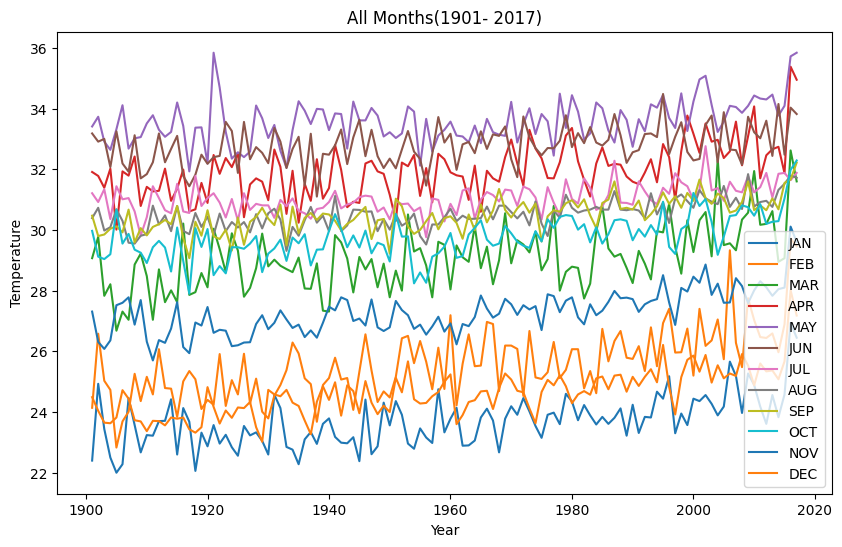

In [6]:
plt.figure(figsize=(10,6))
plt.plot(temp_dataset["YEAR"],temp_dataset.iloc[:,1:13])
plt.xlabel("Year")
plt.ylabel("Temperature")
plt.title("All Months(1901- 2017)")
plt.legend(["JAN","FEB","MAR","APR","MAY","JUN","JUL","AUG","SEP","OCT","NOV","DEC"])
plt.show()

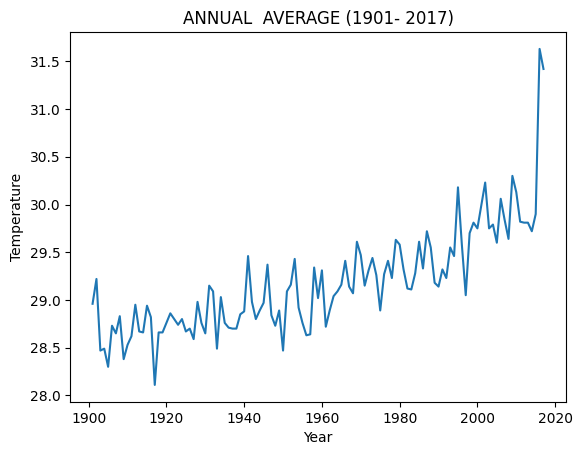

In [7]:
plt.plot(temp_dataset["YEAR"],temp_dataset["ANNUAL"])
plt.xlabel("Year")
plt.ylabel("Temperature")
plt.title("ANNUAL  AVERAGE (1901- 2017)")
plt.show()

In [ ]:
Predict Month-wise output

In [ ]:
January

In [8]:
# Split the dataset into training and testing

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X=temp_dataset[["YEAR"]]
y=temp_dataset["JAN"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(X_train.shape, X_test.shape)

# instantiate the model
lr = LinearRegression()

# fit the model
lr.fit(X_train, y_train)

#predicting the target value from the model for the samples
y_test_lr = lr.predict(X_test)
y_train_lr = lr.predict(X_train)

(93, 1) (24, 1)


In [9]:
print("Intercept",lr.intercept_)
print("Slope",lr.coef_)

Intercept 0.040881962829612206
Slope [0.01206848]


In [10]:
#computing the accuracy of the model performance
acc_train_lr = lr.score(X_train, y_train)
acc_test_lr = lr.score(X_test, y_test)

#computing root mean squared error (RMSE)
rmse_train_lr = np.sqrt(mean_squared_error(y_train, y_train_lr))
rmse_test_lr = np.sqrt(mean_squared_error(y_test, y_test_lr))

print("Linear Regression: Accuracy on training Data: {:.3f}".format(acc_train_lr))
print("Linear Regression: Accuracy on test Data: {:.3f}".format(acc_test_lr))
print('\nLinear Regression: The RMSE of the training set is:', rmse_train_lr)
print('Linear Regression: The RMSE of the testing set is:', rmse_test_lr)

Linear Regression: Accuracy on training Data: 0.264
Linear Regression: Accuracy on test Data: 0.460

Linear Regression: The RMSE of the training set is: 0.6660910902332354
Linear Regression: The RMSE of the testing set is: 0.7461610613861774


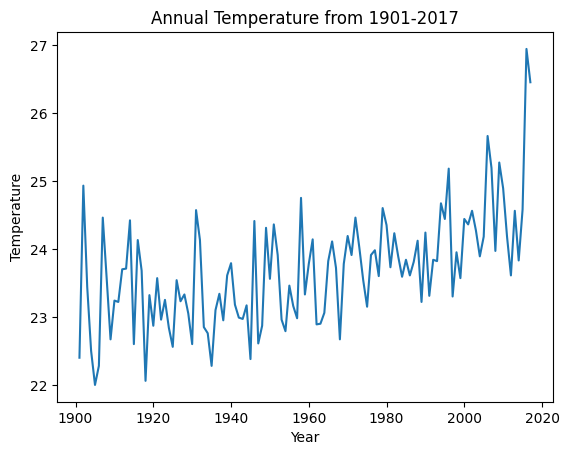

In [11]:
#visulaize annaul temperature
plt.plot(X,y)
plt.xlabel("Year")
plt.ylabel("Temperature")
plt.title("Annual Temperature from 1901-2017")
plt.show()

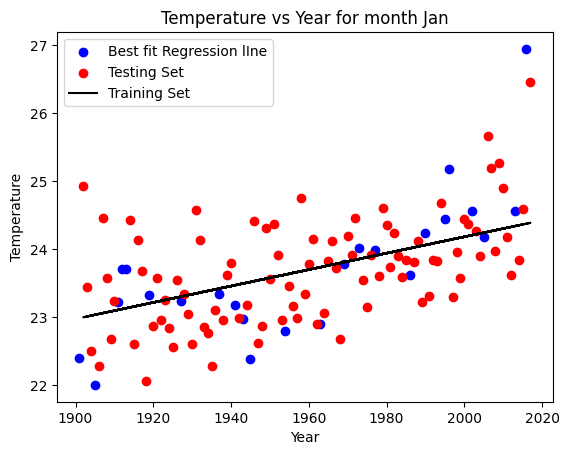

In [12]:
# Visualization
#plt.figure(figsize=(8, 6))
plt.scatter(X_test,y_test,color = 'blue');
plt.scatter(X_train,y_train,color = 'red');
plt.plot(X_train,lr.predict(X_train), color = 'black');
plt.legend(['Best fit Regression lIne','Testing Set','Training Set'])
plt.title('Temperature vs Year for month Jan')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.show();

In [13]:
#Errors for month Jan
print('R-Squared Error :',r2_score(y_test,y_test_lr))
print('Mean Absolute Error :',mean_absolute_error(y_test,y_test_lr))
print('Mean Squared Error :',mean_squared_error(y_test,y_test_lr))
print('Root Mean Squared Error :',np.sqrt(mean_squared_error(y_test,y_test_lr)))

R-Squared Error : 0.46011716485159526
Mean Absolute Error : 0.5083956669577455
Mean Squared Error : 0.5567563295289469
Root Mean Squared Error : 0.7461610613861774


In [ ]:
February

In [18]:
# Split the dataset into training and testing

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X=temp_dataset[["YEAR"]]
y=temp_dataset["FEB"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(X_train.shape, X_test.shape)

# instantiate the model
lr = LinearRegression()
# fit the model
lr.fit(X_train, y_train)

#predicting the target value from the model for the samples
y_test_lr = lr.predict(X_test)
y_train_lr = lr.predict(X_train)

(93, 1) (24, 1)


In [19]:
print("Intercept",lr.intercept_)
print("Slope",lr.coef_)

Intercept -13.589454788386252
Slope [0.01998518]


In [20]:
#computing the accuracy of the model performance
acc_train_lr = lr.score(X_train, y_train)
acc_test_lr = lr.score(X_test, y_test)

#computing root mean squared error (RMSE)
rmse_train_lr = np.sqrt(mean_squared_error(y_train, y_train_lr))
rmse_test_lr = np.sqrt(mean_squared_error(y_test, y_test_lr))

print("Linear Regression: Accuracy on training Data: {:.3f}".format(acc_train_lr))
print("Linear Regression: Accuracy on test Data: {:.3f}".format(acc_test_lr))
print('\nLinear Regression: The RMSE of the training set is:', rmse_train_lr)
print('Linear Regression: The RMSE of the testing set is:', rmse_test_lr)

Linear Regression: Accuracy on training Data: 0.366
Linear Regression: Accuracy on test Data: 0.534

Linear Regression: The RMSE of the training set is: 0.8686967555951215
Linear Regression: The RMSE of the testing set is: 0.9079689831221699


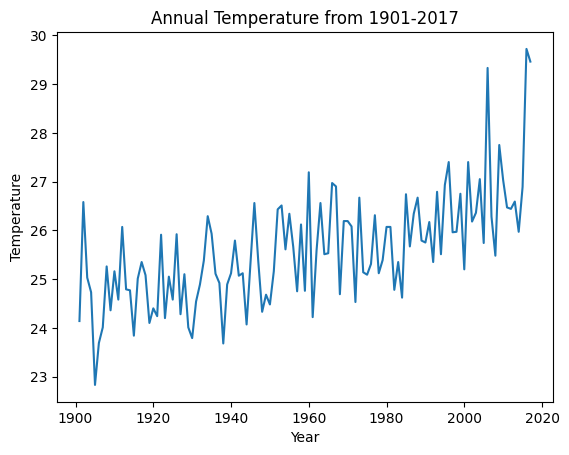

In [21]:
#visulaize annaul temperature
plt.plot( X,y )
plt.xlabel("Year")
plt.ylabel("Temperature")
plt.title("Annual Temperature from 1901-2017")
plt.show()

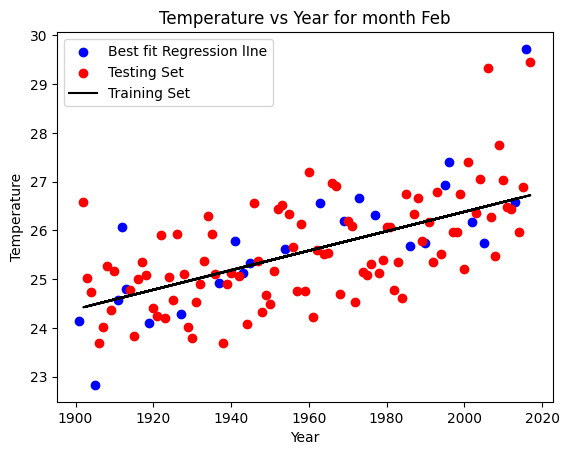

In [22]:
# Visualization
#plt.figure(figsize=(12, 9))
plt.scatter(X_test,y_test,color = 'blue');
plt.scatter(X_train,y_train,color = 'red');
plt.plot(X_train,lr.predict(X_train), color = 'black');
plt.legend(['Best fit Regression lIne','Testing Set','Training Set'])
plt.title('Temperature vs Year for month Feb')
plt.ylabel('Temperature')
plt.xlabel('Year')
plt.show();

In [23]:
#Errors for month Feb
print('R-Squared Error :',r2_score(y_test,y_test_lr))
print('Mean Absolute Error :',mean_absolute_error(y_test,y_test_lr))
print('Mean Squared Error :',mean_squared_error(y_test,y_test_lr))
print('Root Mean Squared Error :',np.sqrt(mean_squared_error(y_test,y_test_lr)))

R-Squared Error : 0.5337774396814265
Mean Absolute Error : 0.6321543551026766
Mean Squared Error : 0.8244076743119072
Root Mean Squared Error : 0.9079689831221699


In [ ]:
March

In [24]:
# Split the dataset into training and testing

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X=temp_dataset[["YEAR"]]
y=temp_dataset["MAR"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(X_train.shape, X_test.shape)

# instantiate the model
lr = LinearRegression()
# fit the model
lr.fit(X_train, y_train)

#predicting the target value from the model for the samples
y_test_lr = lr.predict(X_test)
y_train_lr = lr.predict(X_train)

(93, 1) (24, 1)


In [25]:
print("Intercept",lr.intercept_)
print("Slope",lr.coef_)

Intercept 0.8326151493664895
Slope [0.01439656]


In [26]:
#computing the accuracy of the model performance
acc_train_lr = lr.score(X_train, y_train)
acc_test_lr = lr.score(X_test, y_test)

#computing root mean squared error (RMSE)
rmse_train_lr = np.sqrt(mean_squared_error(y_train, y_train_lr))
rmse_test_lr = np.sqrt(mean_squared_error(y_test, y_test_lr))

print("Linear Regression: Accuracy on training Data: {:.3f}".format(acc_train_lr))
print("Linear Regression: Accuracy on test Data: {:.3f}".format(acc_test_lr))
print('\nLinear Regression: The RMSE of the training set is:', rmse_train_lr)
print('Linear Regression: The RMSE of the testing set is:', rmse_test_lr)

Linear Regression: Accuracy on training Data: 0.234
Linear Regression: Accuracy on test Data: 0.412

Linear Regression: The RMSE of the training set is: 0.8613784589579908
Linear Regression: The RMSE of the testing set is: 1.0069570422964147


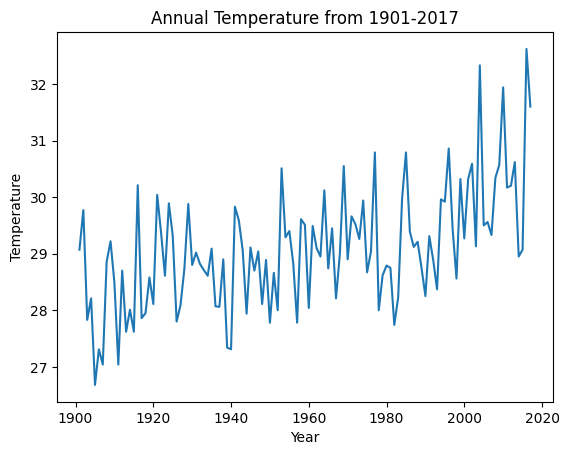

In [27]:
#visulaize annaul temperature
plt.plot( X,y )
plt.xlabel("Year")
plt.ylabel("Temperature")
plt.title("Annual Temperature from 1901-2017")
plt.show()

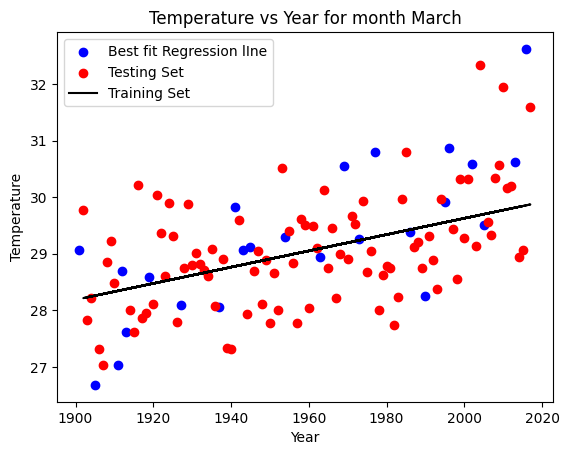

In [28]:
# Visualization
#plt.figure(figsize=(12, 9))
plt.scatter(X_test,y_test,color = 'blue');
plt.scatter(X_train,y_train,color = 'red');
plt.plot(X_train,lr.predict(X_train), color = 'black');
plt.legend(['Best fit Regression lIne','Testing Set','Training Set'])
plt.title('Temperature vs Year for month March')
plt.ylabel('Temperature')
plt.xlabel('Year')
plt.show();

In [29]:
#Errors for month March
print('R-Squared Error :',r2_score(y_test,y_test_lr))
print('Mean Absolute Error :',mean_absolute_error(y_test,y_test_lr))
print('Mean Squared Error :',mean_squared_error(y_test,y_test_lr))
print('Root Mean Squared Error :',np.sqrt(mean_squared_error(y_test,y_test_lr)))

R-Squared Error : 0.41193423910621496
Mean Absolute Error : 0.7784057105758042
Mean Squared Error : 1.0139624850303435
Root Mean Squared Error : 1.0069570422964147


In [ ]:
Mar-May

In [30]:
# Split the dataset into training and testing

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X=temp_dataset[["YEAR"]]
y=temp_dataset["MAR-MAY"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(X_train.shape, X_test.shape)

# instantiate the model
lr = LinearRegression()
# fit the model
lr.fit(X_train, y_train)

#predicting the target value from the model for the samples
y_test_lr = lr.predict(X_test)
y_train_lr = lr.predict(X_train)

(93, 1) (24, 1)


In [31]:
print("Intercept",lr.intercept_)
print("Slope",lr.coef_)

Intercept 6.838794003180684
Slope [0.01258417]


In [32]:
#computing the accuracy of the model performance
acc_train_lr = lr.score(X_train, y_train)
acc_test_lr = lr.score(X_test, y_test)

#computing root mean squared error (RMSE)
rmse_train_lr = np.sqrt(mean_squared_error(y_train, y_train_lr))
rmse_test_lr = np.sqrt(mean_squared_error(y_test, y_test_lr))

print("Linear Regression: Accuracy on training Data: {:.3f}".format(acc_train_lr))
print("Linear Regression: Accuracy on test Data: {:.3f}".format(acc_test_lr))
print('\nLinear Regression: The RMSE of the training set is:', rmse_train_lr)
print('Linear Regression: The RMSE of the testing set is:', rmse_test_lr)

Linear Regression: Accuracy on training Data: 0.381
Linear Regression: Accuracy on test Data: 0.445

Linear Regression: The RMSE of the training set is: 0.5297583992887077
Linear Regression: The RMSE of the testing set is: 0.7002924995190984


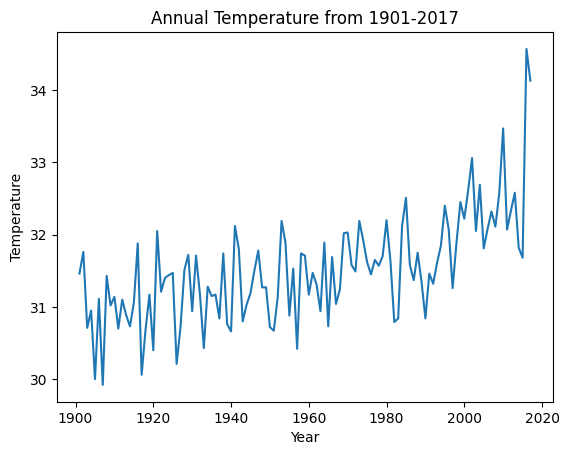

In [34]:
#visulaize annaul temperature
plt.plot(X,y)
plt.xlabel("Year")
plt.ylabel("Temperature")
plt.title("Annual Temperature from 1901-2017")
plt.show()

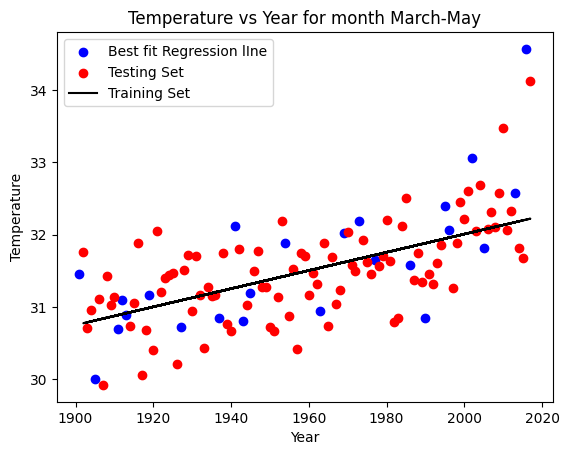

In [35]:
# Visualization
#plt.figure(figsize=(12, 9))
plt.scatter(X_test,y_test,color = 'blue');
plt.scatter(X_train,y_train,color = 'red');
plt.plot(X_train,lr.predict(X_train), color = 'black');
plt.legend(['Best fit Regression lIne','Testing Set','Training Set'])
plt.title('Temperature vs Year for month March-May')
plt.ylabel('Temperature')
plt.xlabel('Year')
plt.show();

In [36]:
#Errors for month Mar-May
print('R-Squared Error :',r2_score(y_test,y_test_lr))
print('Mean Absolute Error :',mean_absolute_error(y_test,y_test_lr))
print('Mean Squared Error :',mean_squared_error(y_test,y_test_lr))
print('Root Mean Squared Error :',np.sqrt(mean_squared_error(y_test,y_test_lr)))

R-Squared Error : 0.4448244662589811
Mean Absolute Error : 0.5121496378249248
Mean Squared Error : 0.49040958488270653
Root Mean Squared Error : 0.7002924995190984
